In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#read the csv file and parse the date column
data = pd.read_csv(r'C:\Users\raksh\OneDrive\Desktop\Sem 4\Econometrics and Time series\Project\Walmart_Store_sales.csv')


In [4]:
#data types of the columns
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
import pandas as pd
from datetime import datetime

# Assuming your data is in a DataFrame named 'data'
def convert_date(date_str):
    try:
        return datetime.strptime(date_str, '%m/%d/%Y')
    except ValueError:
        return datetime.strptime(date_str, '%d-%m-%Y')

data['Date'] = data['Date'].apply(convert_date)


In [6]:
#data types of the columns
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [7]:
#checking for missing values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
#splitting the date into day, month and year
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [9]:
#which store has maximum and minimum sales
store_sales = data.groupby('Store')['Weekly_Sales'].sum()
print('Store with maximum sales:', store_sales.idxmax())
print('Store with minimum sales:', store_sales.idxmin())

Store with maximum sales: 20
Store with minimum sales: 33


In [10]:
#print the values of the store with maximum and minimum sales
print('Store with maximum sales:', store_sales.max())
print('Store with minimum sales:', store_sales.min())


Store with maximum sales: 301397792.46
Store with minimum sales: 37160221.96


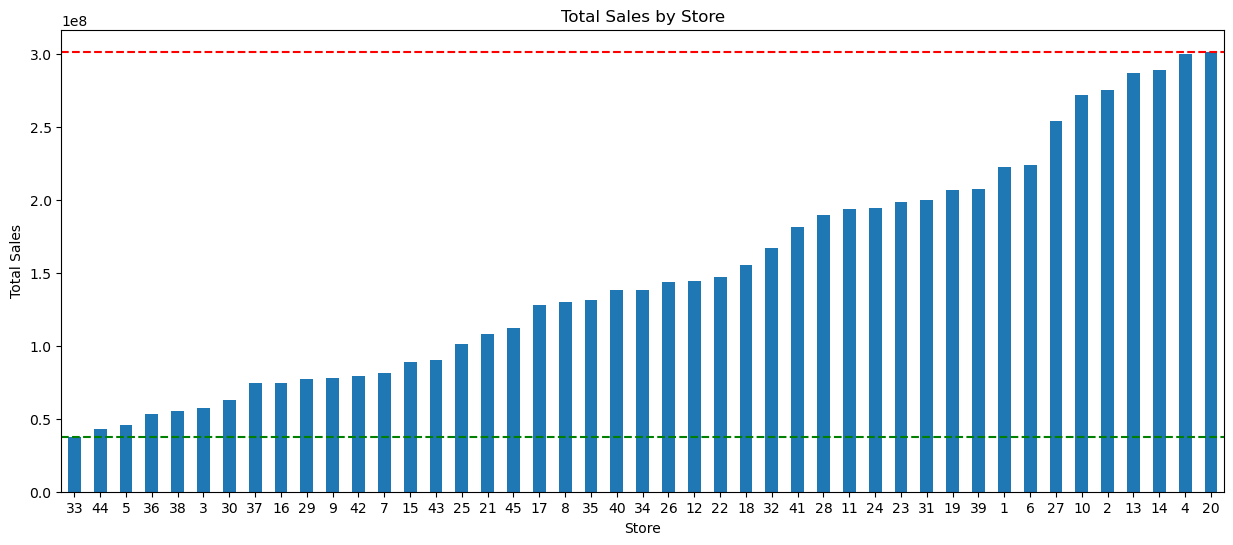

In [11]:
#creating a bar chart in ascending order of sales and highlighting the store with maximum and minimum sales
store_sales.sort_values().plot(kind='bar', figsize=(15, 6))
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')
plt.xticks(rotation=0)
plt.axhline(store_sales.max(), color='r', linestyle='--')
plt.axhline(store_sales.min(), color='g', linestyle='--')
plt.show()


In [12]:
#Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?
store_std = data.groupby('Store')['Weekly_Sales'].std()
store_std.idxmax(), round(store_std.max(), 2)



(14, 317569.95)

In [13]:
#The store has maximum standard deviation is 14 with 317570 $

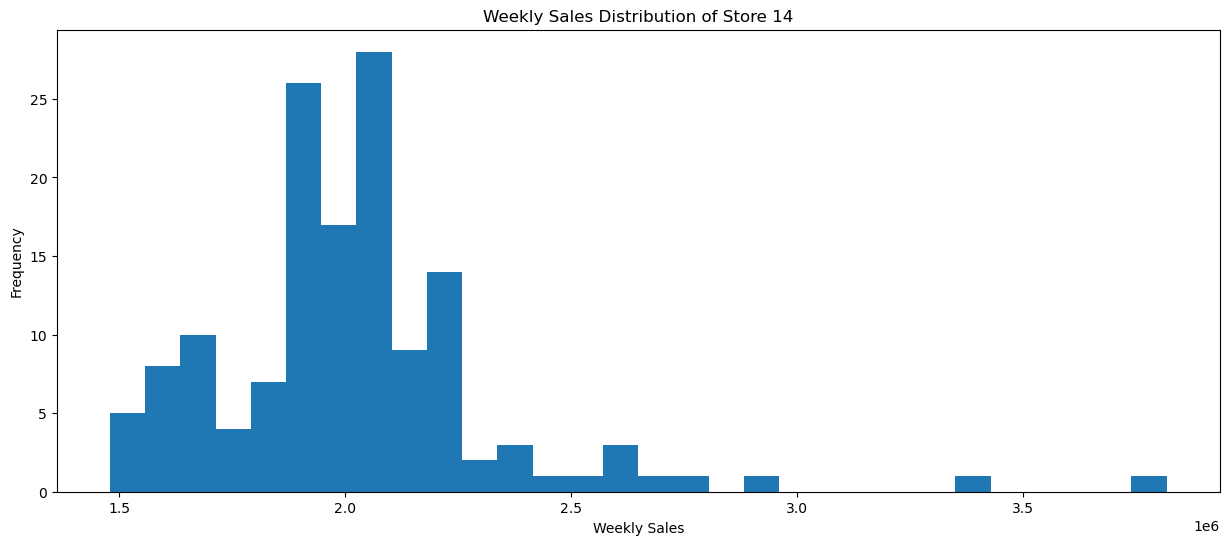

In [14]:
#distribution of the store with maximum standard deviation
store_data = data[data['Store'] == store_std.idxmax()]
store_data['Weekly_Sales'].plot(kind='hist', bins=30, figsize=(15, 6))
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales Distribution of Store 14')
plt.show()

In [52]:
#coefficient of mean to standard deviation to all stores
store_mean = data.groupby('Store')['Weekly_Sales'].mean()
mean_std_ratio = store_std / store_mean


Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

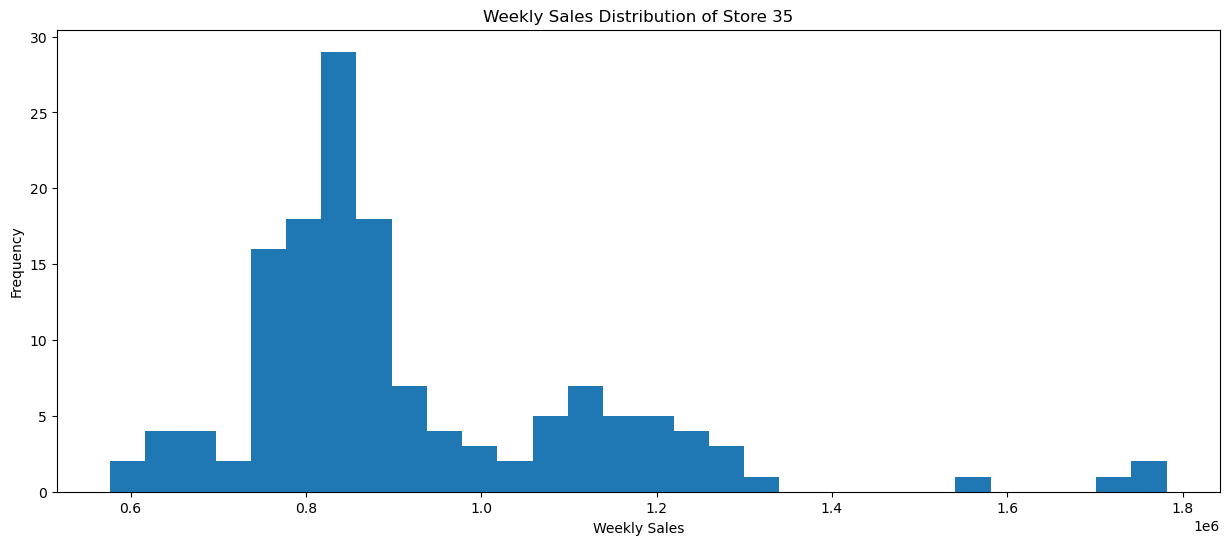

In [16]:
#distribution of the store with mean to standard deviation ratio
store_data = data[data['Store'] == mean_std_ratio.idxmax()]
store_data['Weekly_Sales'].plot(kind='hist', bins=30, figsize=(15, 6))
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales Distribution of Store 35')
plt.show()


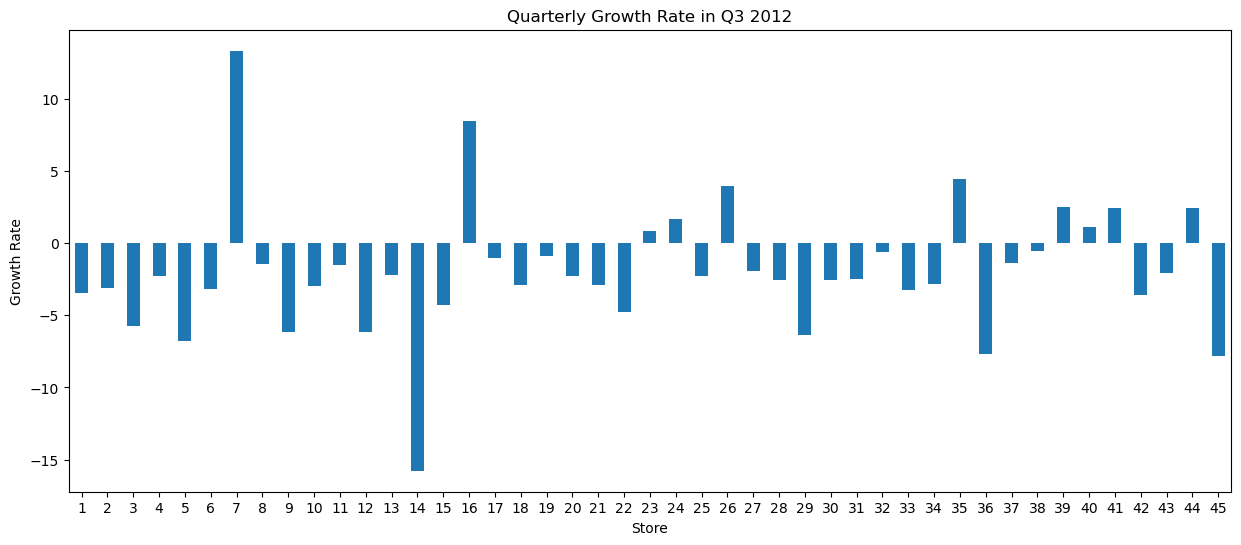

In [17]:
#which store has good quarterly growth rate in Q3’2012 among all stores?
# Calculate the total sales for each store in Q3 2012
q3_2012 = data[(data['Date'] >= '2012-07-01') & (data['Date'] <= '2012-09-30')]
q3_2012_sales = q3_2012.groupby('Store')['Weekly_Sales'].sum()

# Calculate the total sales for each store in Q2 2012
q2_2012 = data[(data['Date'] >= '2012-04-01') & (data['Date'] <= '2012-06-30')]
q2_2012_sales = q2_2012.groupby('Store')['Weekly_Sales'].sum()

# Calculate the growth rate for each store
growth_rate = ((q3_2012_sales - q2_2012_sales) / q2_2012_sales) * 100

#visualizing the growth rate
growth_rate.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Store')
plt.ylabel('Growth Rate')
plt.title('Quarterly Growth Rate in Q3 2012')
plt.xticks(rotation=0)
plt.show()



In [18]:
#print the store with good quarterly growth rate in Q3’2012 among all stores
print('Store with good quarterly growth rate in Q3 2012:', growth_rate.idxmax())
print('Growth Rate:', growth_rate.max())

Store with good quarterly growth rate in Q3 2012: 7
Growth Rate: 13.330776030738022


In [19]:
#4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [20]:
#finding the mean sales of non holiday and holiday 
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [21]:
# Marking the holiday dates 
data['Date'] = pd.to_datetime(data['Date'])

Christmas1 = pd.Timestamp(2010,12,31)
Christmas2 = pd.Timestamp(2011,12,30)
Christmas3 = pd.Timestamp(2012,12,28)
Christmas4 = pd.Timestamp(2013,12,27)

Thanksgiving1=pd.Timestamp(2010,11,26)
Thanksgiving2=pd.Timestamp(2011,11,25)
Thanksgiving3=pd.Timestamp(2012,11,23)
Thanksgiving4=pd.Timestamp(2013,11,29)

LabourDay1=pd.Timestamp(2010,9,10)
LabourDay2=pd.Timestamp(2011,9,9)
LabourDay3=pd.Timestamp(2012,9,7)
LabourDay4=pd.Timestamp(2013,9,6)

SuperBowl1=pd.Timestamp(2010,2,12)
SuperBowl2=pd.Timestamp(2011,2,11)
SuperBowl3=pd.Timestamp(2012,2,10)
SuperBowl4=pd.Timestamp(2013,2,8)

#Calculating the mean sales during the holidays
Christmas_mean_sales=data[(data['Date'] == Christmas1) | (data['Date'] == Christmas2) | (data['Date'] == Christmas3) | (data['Date'] == Christmas4)]
Thanksgiving_mean_sales=data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3) | (data['Date'] == Thanksgiving4)]
LabourDay_mean_sales=data[(data['Date'] == LabourDay1) | (data['Date'] == LabourDay2) | (data['Date'] == LabourDay3) | (data['Date'] == LabourDay4)]
SuperBowl_mean_sales=data[(data['Date'] == SuperBowl1) | (data['Date'] == SuperBowl2) | (data['Date'] == SuperBowl3) | (data['Date'] == SuperBowl4)]
Christmas_mean_sales

list_of_mean_sales = {'Christmas' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Thanksgiving': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday' : round(data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean(),2)}
list_of_mean_sales

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1042427.29,
 'SuperBowl_mean_sales': 1079127.99,
 'Non holiday weekly sales': 1041256.38}

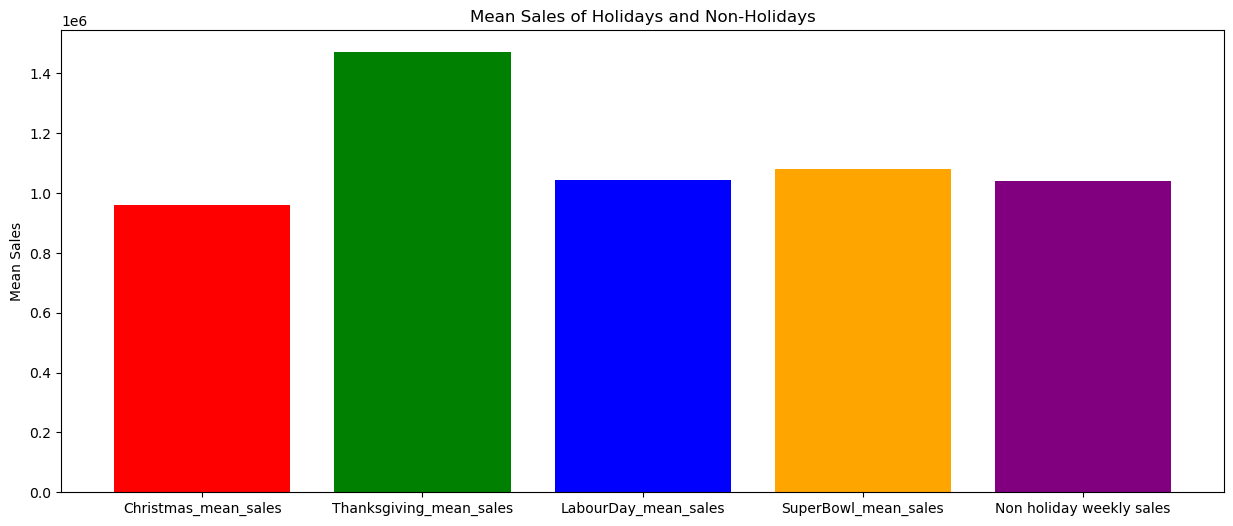

In [22]:
#visualizing the sales of christmas, thanksgiving, labour day and superbowl with values
plt.figure(figsize=(15, 6))
plt.bar(list_of_mean_sales.keys(), list_of_mean_sales.values(), color=['red', 'green', 'blue', 'orange', 'purple'])
plt.ylabel('Mean Sales in Million $')
plt.title('Mean Sales of Holidays and Non-Holidays')
plt.show()




In [23]:
#"Thanksgiving Day" has much high sale than mean sales in Non-Holiday season

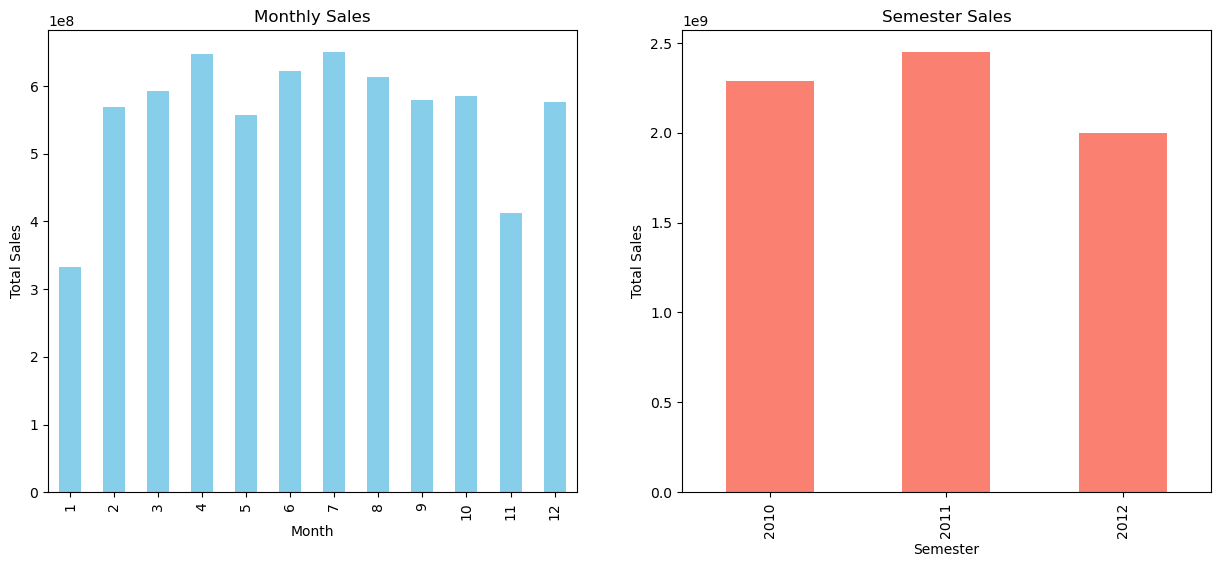

In [24]:
#Provide a total monthly and yearly view of sales in units and give insights
# Monthly sales
monthly_sales = data.groupby('month')['Weekly_Sales'].sum()

# Semester sales
semester_sales = data.groupby('year')['Weekly_Sales'].sum()

# Visualizing the monthly and semester sales
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
monthly_sales.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('Monthly Sales')

semester_sales.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_xlabel('Semester')
ax[1].set_ylabel('Total Sales')
ax[1].set_title('Semester Sales')
plt.show()


In [25]:
#print the highest monthly and yearly sales
print('Month with maximum sales:', monthly_sales.idxmax())
print('Sales:', monthly_sales.max())

print('Year with maximum sales:', semester_sales.idxmax())
print('Sales:', semester_sales.max())


Month with maximum sales: 7
Sales: 650000977.25
Year with maximum sales: 2011
Sales: 2448200007.35


Text(0, 0.5, 'Weekly_Sales')

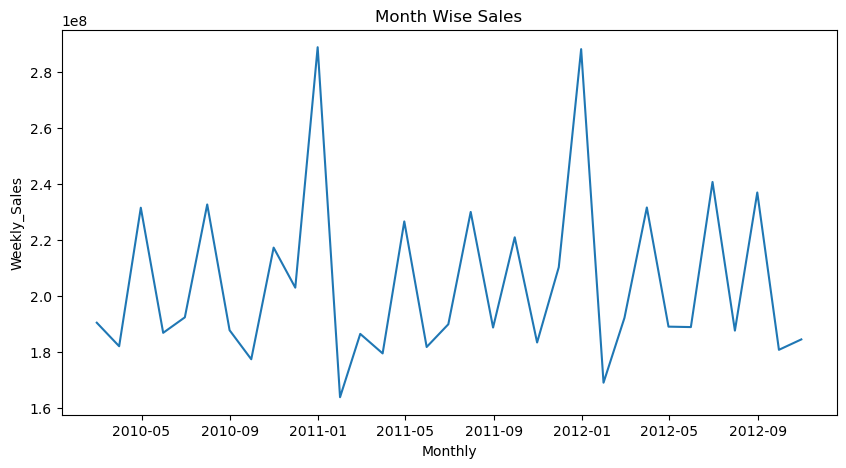

In [26]:
#Individual Monthly sales 
monthly = data.groupby(pd.Grouper(key='Date', freq='1M')).sum() # groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,5))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')


In [27]:
# Analysis- highest sum of sales is recorded in between jan-2011 to march-2011.

In [28]:
#correlation matrix


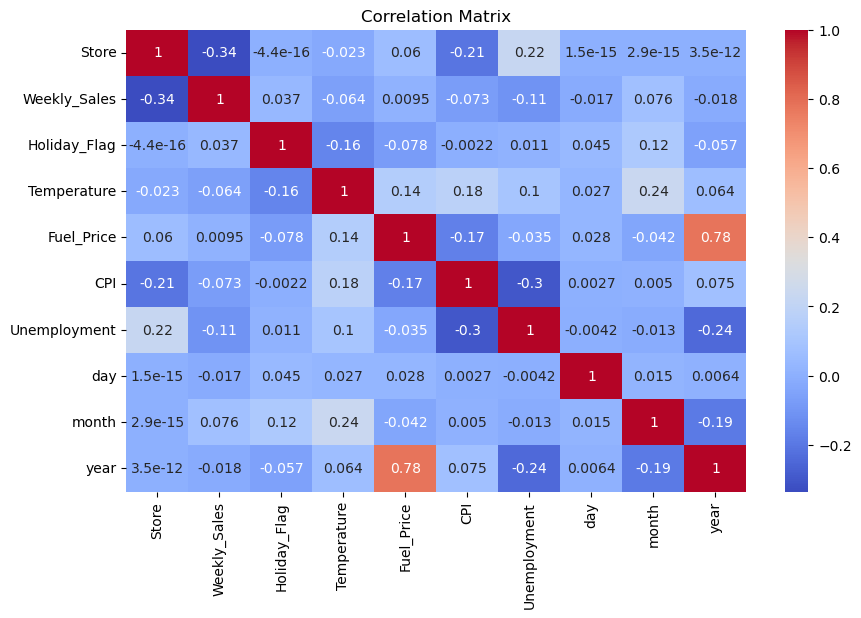

In [29]:
#plotting the correlation matrix
plt.figure(figsize=(10, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
#time series analysis using ARIMA


In [31]:
#create a new dataframe with only the date and weekly sales columns for store 20 as it has maximum sales
store20 = data[data['Store'] == 20]
store20 = store20[['Date', 'Weekly_Sales']]
store20 = store20.set_index('Date')
store20

,Weekly_Sales
Date,
2010-02-05,2401395.47
2010-02-12,2109107.90
2010-02-19,2161549.76
2010-02-26,1898193.95
2010-03-05,2119213.72
...,...
2012-09-28,2008350.58
2012-10-05,2246411.89
2012-10-12,2162951.36


In [32]:
#resampling the data on weekly basis
store20_weekly = store20.resample('W').sum()

<AxesSubplot:xlabel='Date'>

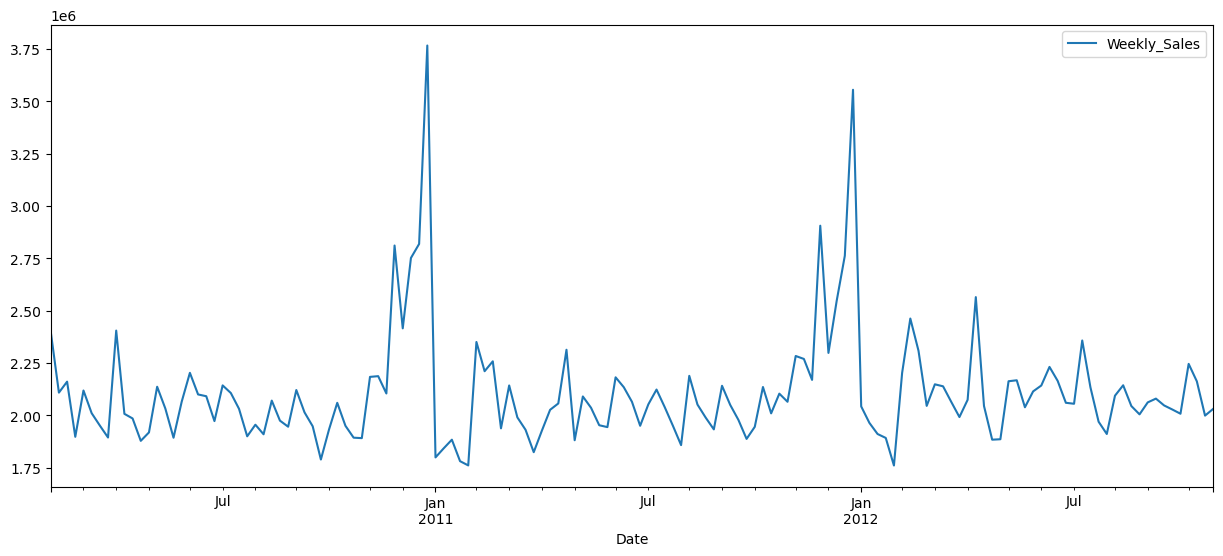

In [33]:
#plotting the weekly sales
store20_weekly.plot(figsize=(15, 6))

In [37]:
#stationarity test
import statsmodels.api as sm

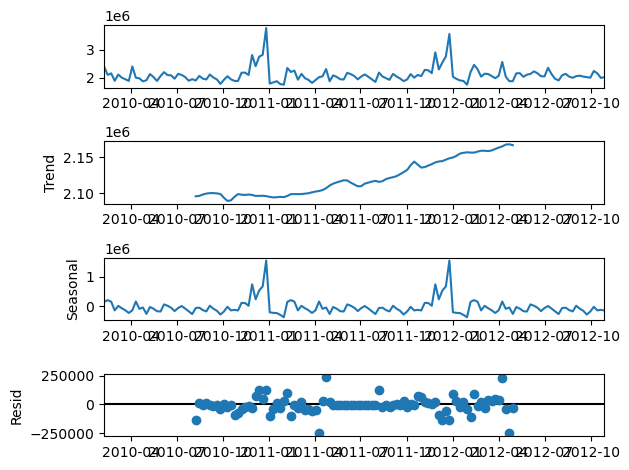

In [38]:
decomposition = sm.tsa.seasonal_decompose(store20_weekly, model='additive')
fig = decomposition.plot()
plt.show()

In [39]:
#adf test
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

adf_test(store20_weekly['Weekly_Sales'])



Results of Augmented Dickey-Fuller Test:
Test Statistic                  -5.393739
p-value                          0.000003
#Lags Used                       4.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


In [42]:
##// Based on the results of the ADF test for store 20's weekly sales, with a highly negative test statistic 
#and a very low p-value, we can confidently conclude that the time series is stationary
#This is a crucial assumption for many time series modeling techniques, including ARIMA

In [45]:
# Fit ARIMA model
# Change the order parameters (p, d, q) based on your analysis of ACF and PACF plots
# Here, I'm assuming an ARIMA(1, 1, 1) model
model = ARIMA(store20_weekly['Weekly_Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1977.037
Date:                Tue, 30 Apr 2024   AIC                           3960.074
Time:                        16:27:27   BIC                           3968.942
Sample:                    02-07-2010   HQIC                          3963.678
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4418      0.080      5.517      0.000       0.285       0.599
ma.L1         -0.9613      0.038    -25.046      0.000      -1.037      -0.886
sigma2      7.513e+10   6.71e-13   1.12e+23      0.0

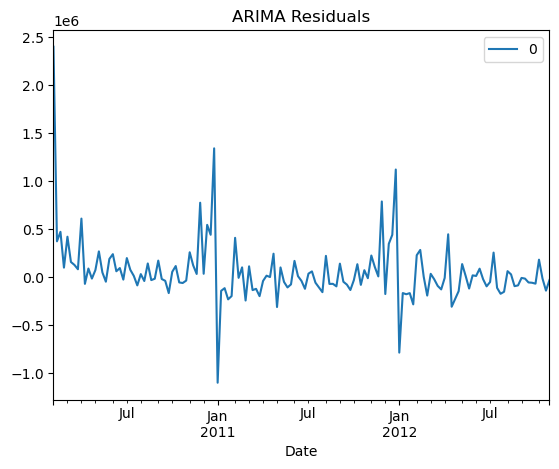

In [46]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Residuals')
plt.show()

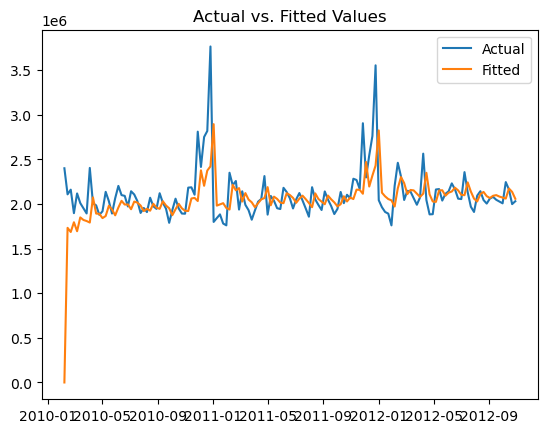

In [47]:
# Plot actual vs. fitted values
plt.plot(store20_weekly.index, store20_weekly['Weekly_Sales'], label='Actual')
plt.plot(store20_weekly.index, model_fit.fittedvalues, label='Fitted')
plt.legend()
plt.title('Actual vs. Fitted Values')
plt.show()


In [53]:
# Forecast
forecast = model_fit.forecast(steps=10)  # Adjust steps as needed
print('Forecasted values:', forecast)


Forecasted values: 2012-11-04    2.072398e+06
2012-11-11    2.090401e+06
2012-11-18    2.098354e+06
2012-11-25    2.101868e+06
2012-12-02    2.103421e+06
2012-12-09    2.104107e+06
2012-12-16    2.104410e+06
2012-12-23    2.104544e+06
2012-12-30    2.104603e+06
2013-01-06    2.104629e+06
Freq: W-SUN, Name: predicted_mean, dtype: float64
